In [2]:
# Relative path
import sys
from mlpython.fio import load_object, save_object  
import xarray as xr

# May not need to do this again
import os
os.environ['PATH'] = os.environ['PATH'] + ':/Library/TeX/texbin/'
import pandas as pd
import tqdm as tqdm
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

# Plotting style
plt.style.use('../grl.mplstyle')

from helper import compute_dEdt, compute_waves, compute_Phi

%load_ext autoreload
%autoreload 3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Figure 1

In [9]:
DIR = '/Users/jiarongw/Data/multilayer_data/JFM2023/'
for label in ['C1','C2','C3','C4','C5']:
    filename = DIR + 'compilation/dissipation_' + label + '.nc'
    diss = xr.open_dataset(filename, engine='h5netcdf')
    print(diss.Hs.values)
    print(diss.sigma.values)

[0.98663138 0.98594217 0.98544163 0.98368133]
[0.09974846 0.10076415 0.10237286 0.10310421]
[1.10370223 1.10107276 1.09956942 1.09718704]
[0.1162927  0.11891929 0.12071859 0.1217051 ]
[1.35897865 1.34942003 1.34468694 1.34053289]
[0.14704776 0.14652936 0.14692152 0.14549327]
[1.46030114 1.45835894 1.44407576 1.44220403]
[0.15442404 0.15181892 0.15157989 0.14969418]
[1.73489936 1.73040034 1.72115795 1.69685996]
[0.16455624 0.16234991 0.16310346 0.16071143]


/Users/jiarongw/Data/multilayer_data/JFM2023/compilation/dissipation_C1.nc
/Users/jiarongw/Data/multilayer_data/JFM2023/compilation/dissipation_C2.nc
/Users/jiarongw/Data/multilayer_data/JFM2023/compilation/dissipation_C3.nc
/Users/jiarongw/Data/multilayer_data/JFM2023/compilation/dissipation_C4.nc
/Users/jiarongw/Data/multilayer_data/JFM2023/compilation/dissipation_C5.nc
[0.8        0.86315789 0.92631579 0.98947368 1.05263158 1.11578947
 1.17894737 1.24210526 1.30526316 1.36842105 1.43157895 1.49473684
 1.55789474 1.62105263 1.68421053 1.74736842 1.81052632 1.87368421
 1.93684211 2.        ]


Text(1, 0.0002, '$k^{-3}$')

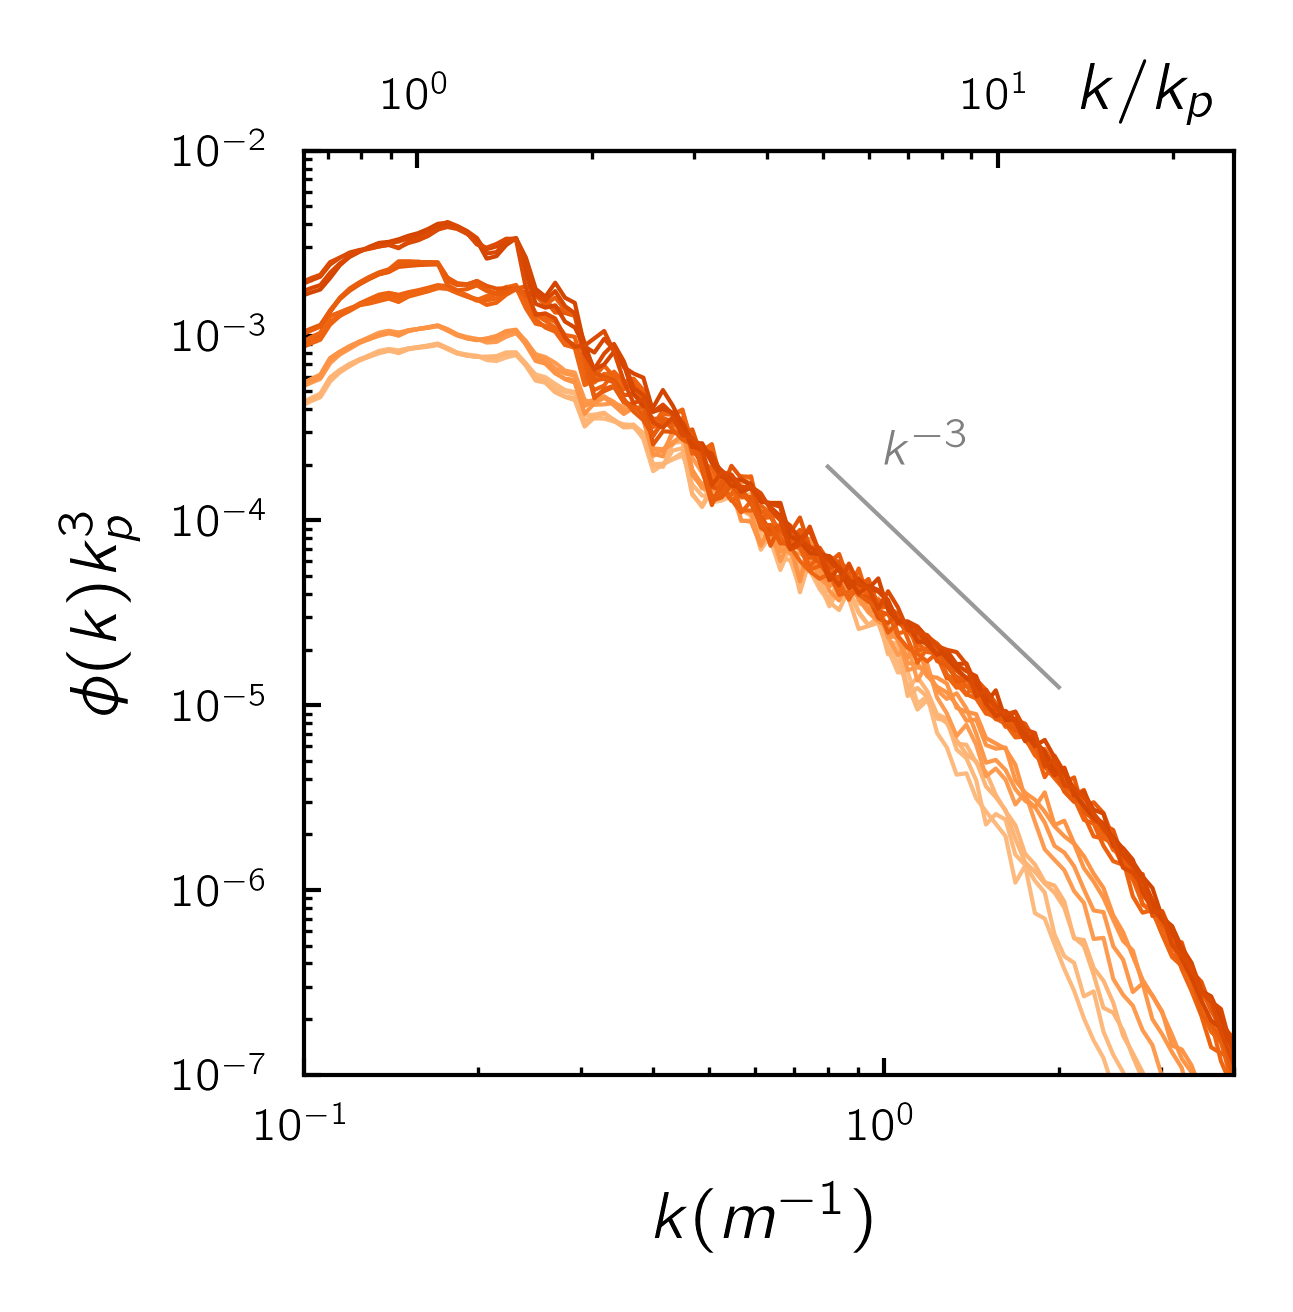

In [6]:
''' We need to smooth out the Ek and Ep curves otherwise the oscillation is going to impede dEk/dt and dEp/dt calculation 
    But we are only analyzing the value of dE/dt, so I removed the filter. 
'''
fig = plt.figure (figsize=[2,2]); ax = plt.gca()

DIR = '/Users/jiarongw/Data/multilayer_data/JFM2023/'
for label in ['C1','C2','C3','C4','C5']:
    filename = DIR + 'compilation/dissipation_' + label + '.nc'
    diss = xr.open_dataset(filename, engine='h5netcdf')
    print(filename)
    
    for i,t in enumerate(diss.tbin):
        cc = mpl.colormaps['Oranges']((diss.sigma.values[i]-0.05)/(0.2-0.05))
        ax.plot(diss.kbins, diss.F[i]*diss.kp**3, c=cc, lw=0.5)
    # ax.plot(moving_averages.t*(case.diss.kp*9.8)**0.5, 2*moving_averages.gpe/(case.energy.ke[0]+case.energy.gpe[0]), '-', c=cc)
    # # ax.plot(moving_averages.t*(case.diss.kp*9.8)**0.5, (moving_averages.ke+moving_averages.gpe)/(case.energy.ke[0]+case.energy.gpe[0]), '-', c=cc)
    # ax.plot(case.energy.t*(case.diss.kp*9.8)**0.5, (case.energy.ke+case.energy.gpe)/(case.energy.ke[0]+case.energy.gpe[0]), 
    #         alpha=0.5, lw=2, c=cc)
            
ax.set_xscale('log'); ax.set_yscale('log')
ax.set_xlim([0.1,4])
ax.set_ylim([10**(-7),10**(-2)])
ax.set_xlabel('$k (m^{-1})$'); ax.set_ylabel('$\phi(k)k_p^3$')

def timeskp(x):
    global diss
    return x * (diss.kp)
def dividekp(x):
    global diss
    return x / (diss.kp)
secax = ax.secondary_xaxis('top', functions=(dividekp, timeskp))
ax.annotate('$k/k_p$', xy=(1,1), xytext=(-2, 3), ha='right', va='bottom',
             xycoords='axes fraction', textcoords='offset points')
tick_pos =[1,10]
labels = ['$10^{0}$', '$10^{1}$']
secax.set_xticks(tick_pos, labels)

xplot = np.linspace(0.8,2,20)
print(xplot)
ax.plot(xplot, xplot**(-3)*0.0001, c='gray', alpha=0.8)
ax.annotate('$k^{-3}$',(1,2*10**(-4)), fontsize=6, c='gray')
# plt.savefig('../figures/multilayer-diss/fig1b.pdf', bbox_inches='tight')

In [3]:
''' We need to smooth out the Ek and Ep curves otherwise the oscillation is going to impede dEk/dt and dEp/dt calculation 
    But we are only analyzing the value of dE/dt, so I removed the filter. 
'''
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
from matplotlib.ticker import FuncFormatter, MultipleLocator

DIR1 = '/Users/jiarongw/Data/multilayer_data/JFM2023/'
DIR2 = '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/'

#### Formating the figure with normalization factor omegap and cp ####

def ax1_format(ax, omegap):
    for xloc in (100,120,140,160,180):            
        ax.axvline(x=xloc, color = 'k', linestyle = '--')
    ax.set_xlabel(r'$t \;(s)$'); ax.set_xlim([0,200])
    ax.set_ylabel(r'$E(t)/E_0$'); ax.set_ylim([0.7,1.05])
    ax.set_xticks([0,40,80,120,160,200])
    ax.annotate('tw1',(101,0.71), fontsize=6)
    ax.annotate('tw2',(121,0.71), fontsize=6)
    ax.annotate('tw3',(141,0.71), fontsize=6)
    ax.annotate('tw4',(161,0.71), fontsize=6)
    def timesomega(x):
        return x * omegap
    def divideomega(x):
        return x / omegap
    secax = ax.secondary_xaxis('top', functions=(timesomega, divideomega))
    ax.annotate('$\omega_p t$', xy=(1,1), xytext=(-2, 3), ha='right', va='bottom',
                xycoords='axes fraction', textcoords='offset points')
    tick_pos =[ 0,20*np.pi,40*np.pi,60*np.pi,80*np.pi]
    labels = ['0','$20\pi$','$40\pi$','$60\pi$','$80\pi$']
    secax.set_xticks(tick_pos, labels)

    ax2  = fig.add_axes([0.15,0.15,0.01,0.25])
    norm = mpl.colors.Normalize(vmin=0.05, vmax=0.2)
    cbar = mpl.colorbar.ColorbarBase(ax2, cmap=plt.get_cmap('Oranges'), norm=norm, orientation='vertical', ticks=(0.05,0.1,0.15,0.2))
    cbar.ax.tick_params(labelsize=6)
    cbar.ax.text(0.5, 1.15, r'$\sigma$', ha='center', va='center', transform=cbar.ax.transAxes)

def ax2_format (ax, cp):
    ax.set_xscale('log'); ax.set_yscale('log')
    ax.set_ylim([10**(-4),10**(0)])
    ax.set_xlim([0.7,20])
    ax.set_xlabel(r'$c\;(m/s)$')
    ax.set_ylabel(r'$\Lambda(c)c^5 \;\mathrm{(m^{3}s^{-4})}$')
    def timescp(x):
        return x * cp
    def dividecp(x):
        return x / cp
    secax = ax.secondary_xaxis('top', functions=(dividecp, timescp))
    ax.annotate('$c/c_p$', xy=(1,1), xytext=(-2, 3), ha='right', va='bottom',
                xycoords='axes fraction', textcoords='offset points')
    tick_pos =[0.1,1]
    labels = ['$10^{-1}$','$10^{0}$']
    secax.set_xticks(tick_pos, labels)                            

C1
C2
C3
C4_rand4
C5_rand4


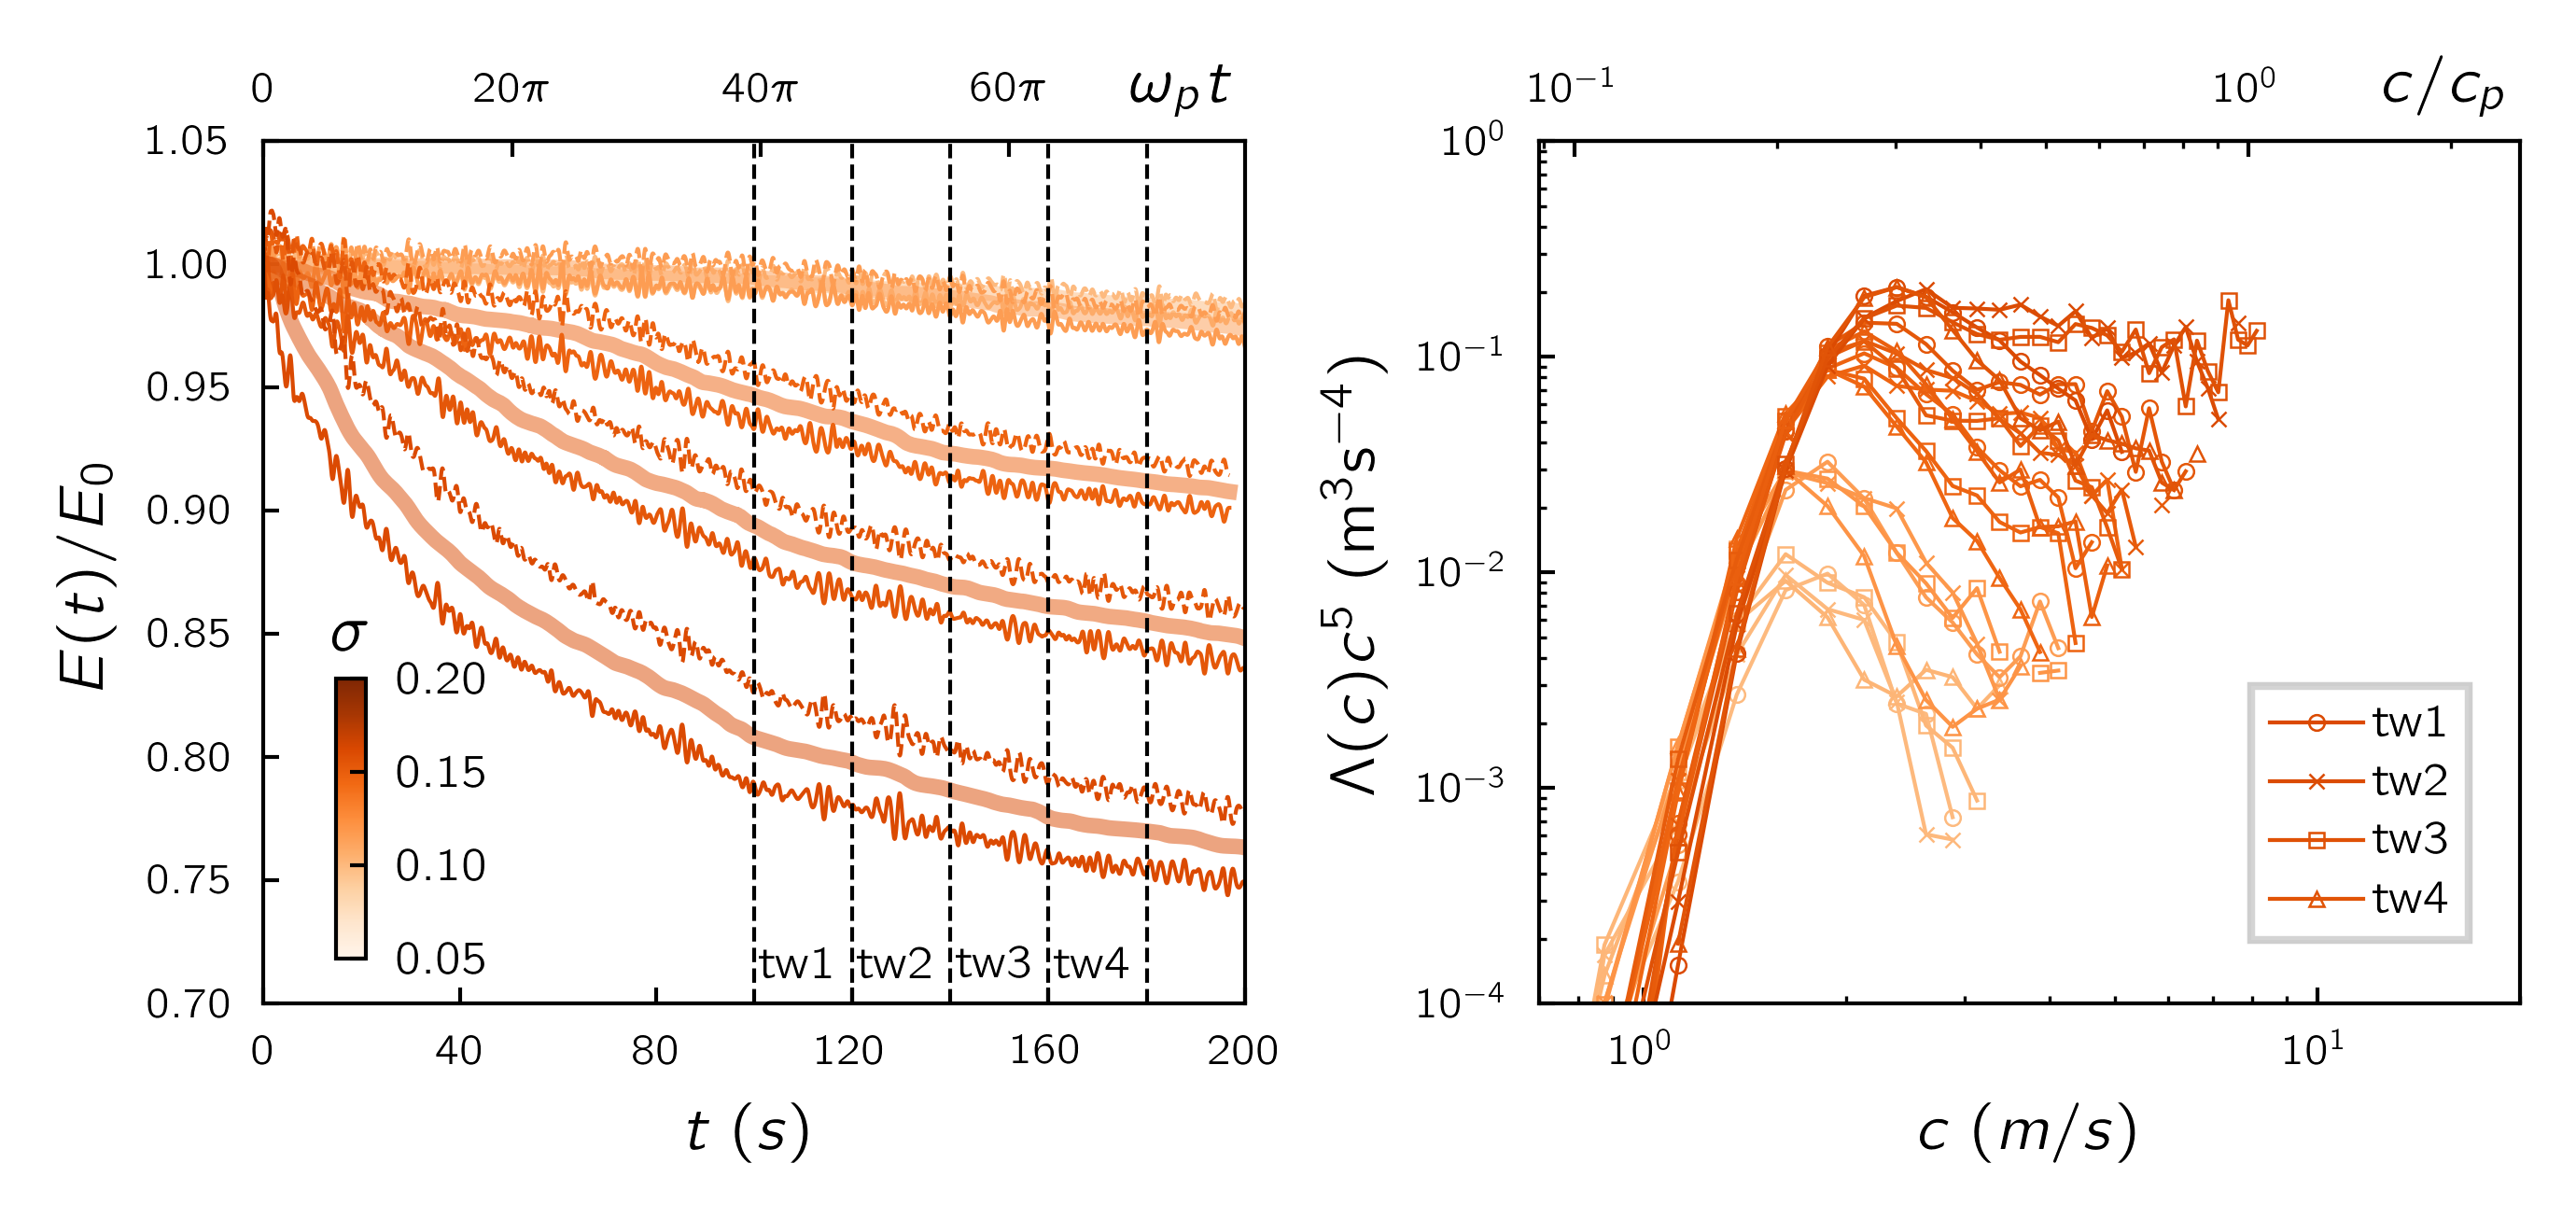

In [15]:
#### Define the time windows and some shared meta data ####
tbins=[100,120,140,160,180]
kp = 2*np.pi/40  # Note: kp is the same for all cases plotted here but might need to be changed
cp = (9.8/kp)**0.5
omegap = (kp*9.8)**0.5 # shared by all cases

#### Define some plotting parameters ####
fig, axes = plt.subplots (1, 2, figsize=[5.2,2])
window_size = 1 # energy moving average
lines = ['-o','-x','-s','-^'] # lines for different time windows

#### Loop through cases and plot ####
for label in ['C1','C2','C3','C4_rand4','C5_rand4']:
    print (label)
    # Read in the time series of eta and hist of breakers
    filename = DIR2 + label + '/series.nc'
    ds = xr.open_dataset(filename, engine='h5netcdf')
    filename = DIR2 + label + '/breaking_hist.nc'
    hist = xr.open_dataset(filename, engine='h5netcdf')
    sigmas, Hss = compute_waves(ds, tbins) # Compute sigma and Hs

    # Plot energy
    ax = axes[0]
    filename = DIR2 + label + '/energy.dat'
    energy = pd.read_csv(filename, delimiter=' ', names=['t','ke','gpe'])
    windows = energy.rolling(window_size); moving_averages = windows.mean()    
    cc = mpl.colormaps['Oranges']((sigmas[0]-0.05)/(0.2-0.05))
    ax.plot(moving_averages.t, 2*moving_averages.ke/(energy.ke[0]+energy.gpe[0]), '--', c=cc)
    ax.plot(moving_averages.t, 2*moving_averages.gpe/(energy.ke[0]+energy.gpe[0]), '-', c=cc)
    ax.plot(energy.t, (energy.ke+energy.gpe)/(energy.ke[0]+energy.gpe[0]), alpha=0.5, lw=2, c=cc)
    
    # Plot breaking over time windows
    ax = axes[1]
    lls = [] # for legend (only keeping the last case)
    for i in range(len(tbins)-1):
        hist_aver = hist.hist.sel(t=slice(tbins[i],tbins[i+1])).mean(dim='t')
        hist_aver = hist_aver.where(hist_aver>1e-1)
        lambdac = hist_aver/2**ds.attrs['LEVEL']/ds.attrs['L']/(hist.c[2] - hist.c[1])
        cc = mpl.colormaps['Oranges']((sigmas[i]-0.05)/(0.2-0.05))
        ll, = ax.plot(hist.c.values, lambdac.values*hist.c.values**5, lines[i], c=cc, alpha=1, lw=0.5)
        lls.append(ll)
        
legend1 = axes[1].legend([lls[0],lls[1],lls[2],lls[3]], ['tw1', 'tw2', 'tw3', 'tw4'], fontsize=6, 
                  handler_map={tuple: HandlerTuple(ndivide=None)}, handlelength=2, bbox_to_anchor=(0.697, 0.4))
axes[1].add_artist(legend1)

ax1_format(axes[0], omegap)
ax2_format(axes[1], cp)  
plt.subplots_adjust(wspace=0.3)
plt.show()
# plt.savefig('../figures/multilayer-diss/fig1cd.pdf', bbox_inches='tight')


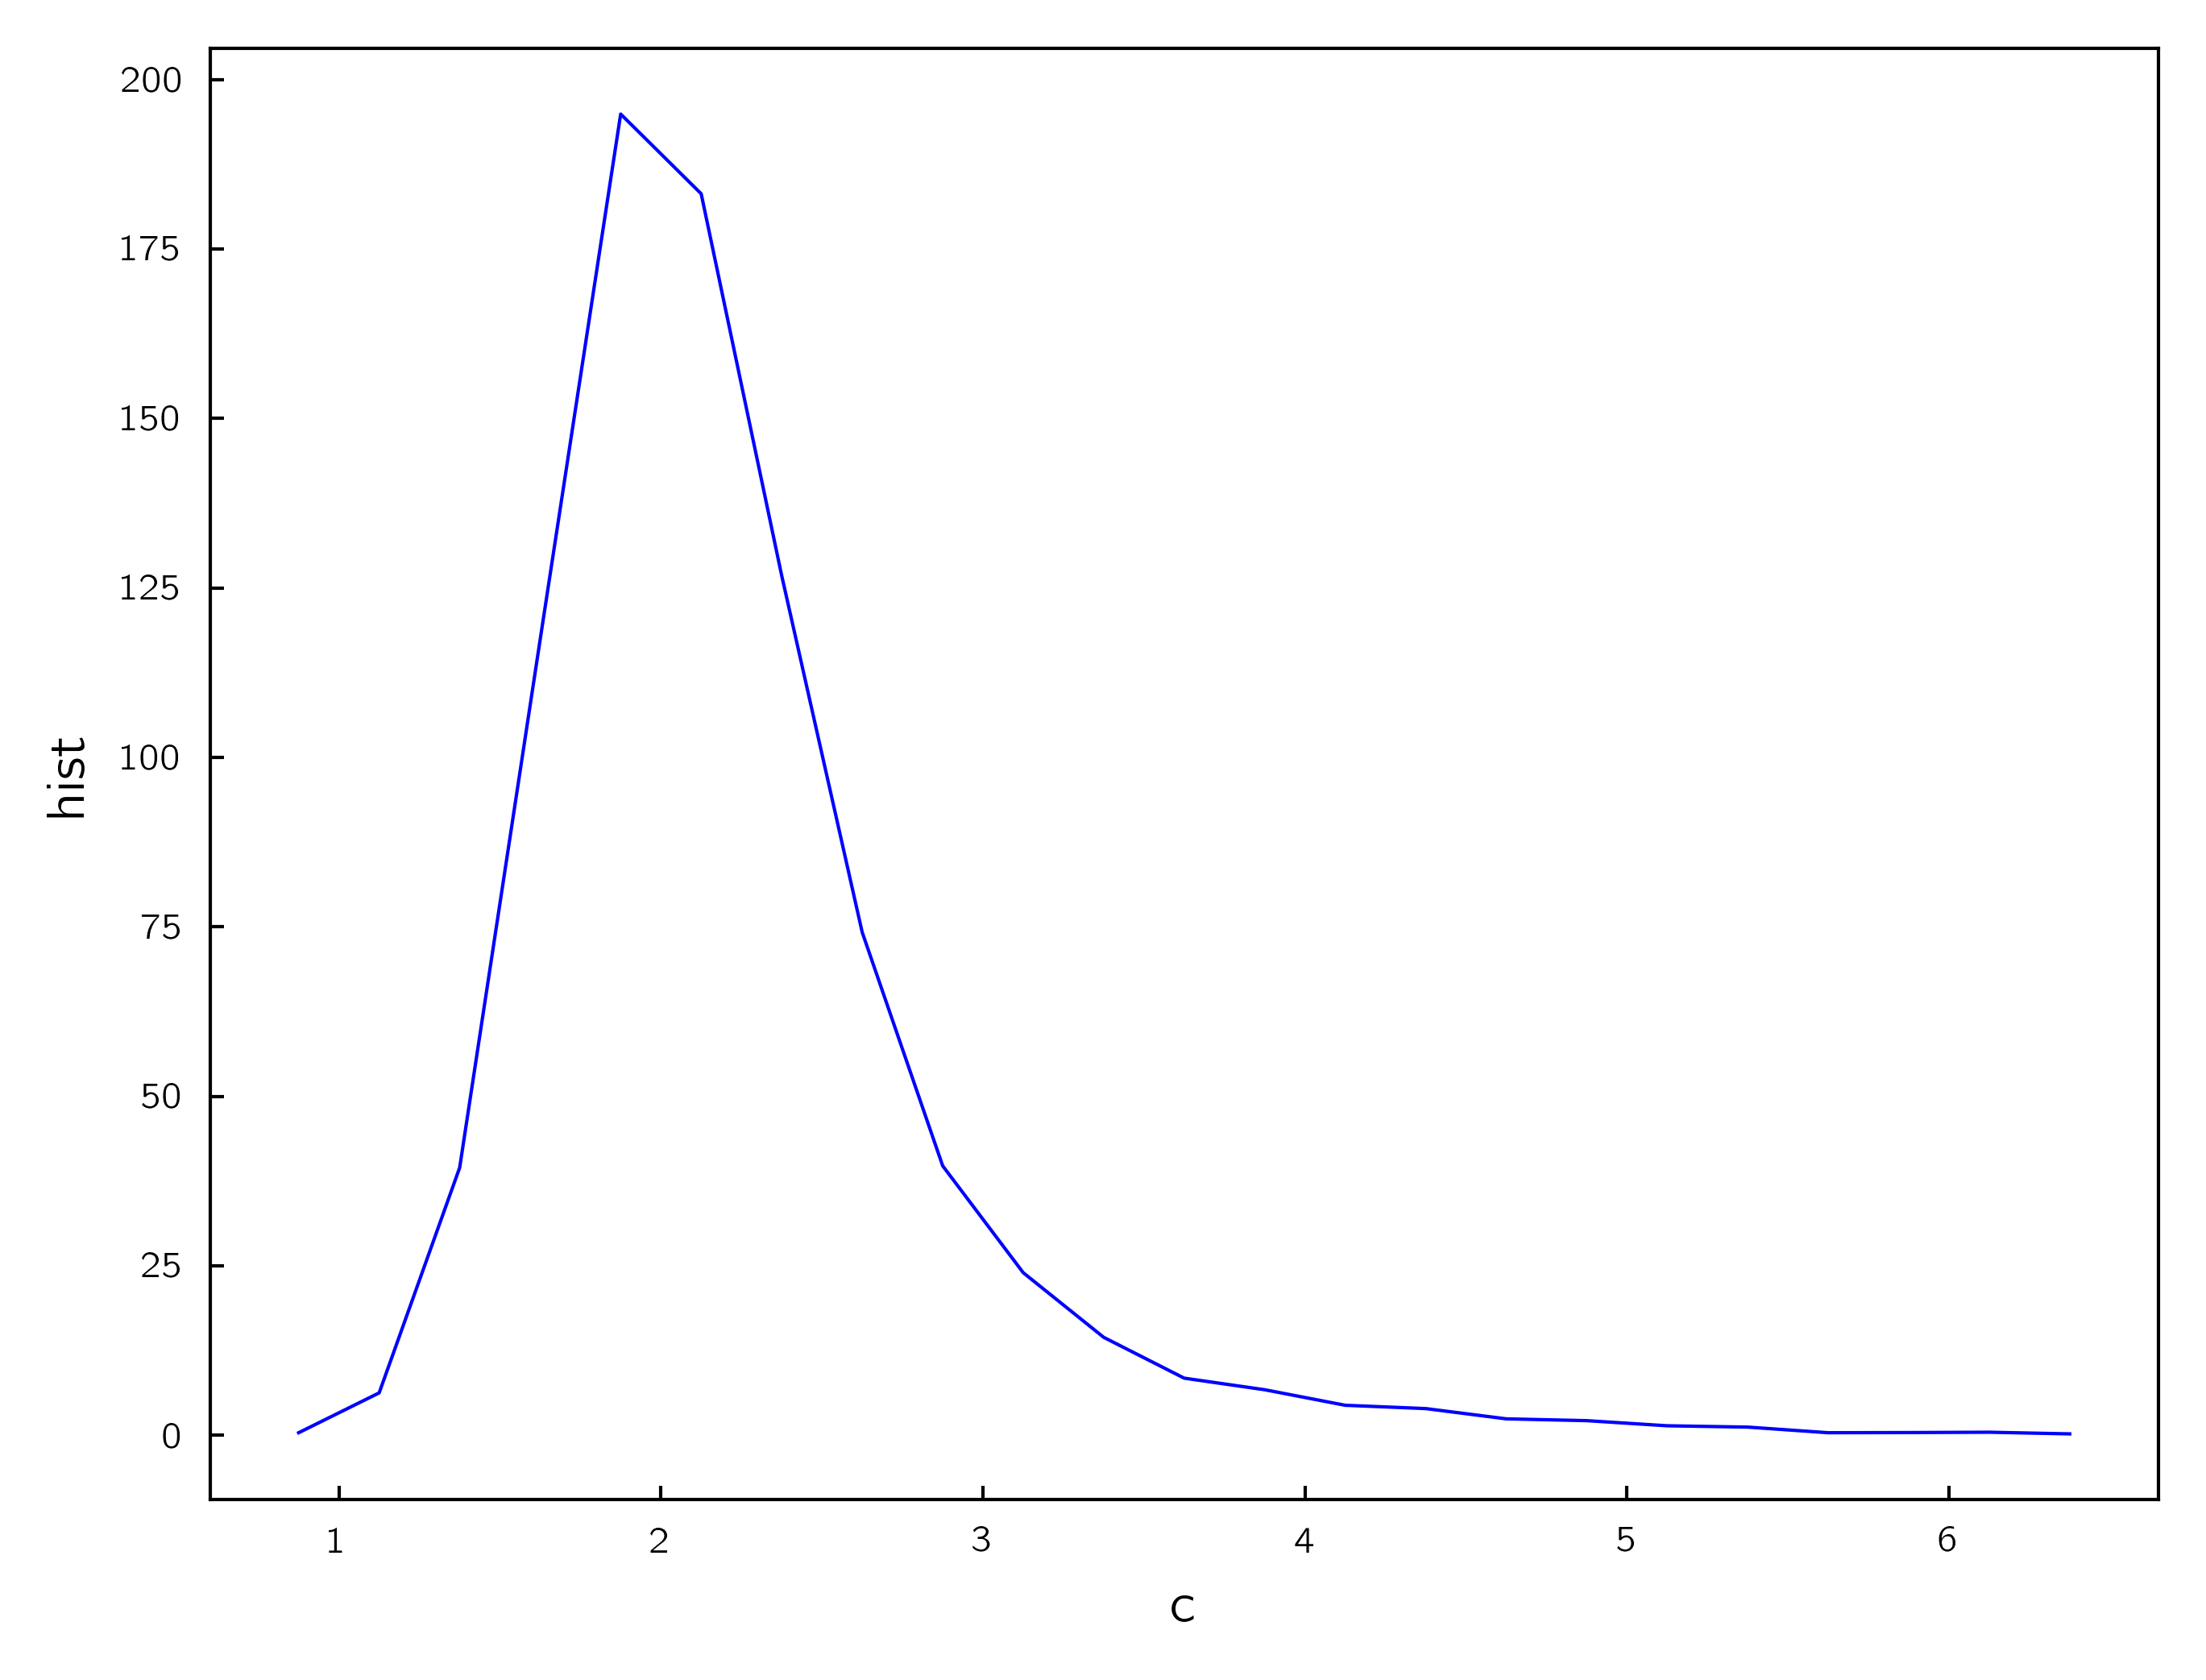

In [10]:
hist_aver = hist.hist.sel(t=slice(100,120)).mean(dim='t')
hist_aver.where(hist_aver>1e-1).plot()

../../multilayer/JFM2023/compilation/dissipation_C1.nc
../../multilayer/JFM2023/field_new_200m_P0.008_RE40000_10_15_rand2_Htheta0.503/
[0.09974846 0.10076415 0.10237286 0.10310421]
[6.88131313e-05 5.10101010e-05 6.33838384e-05 1.05176768e-04]
[6.88131313e-05 5.10101010e-05 6.33838384e-05 1.05176768e-04]
../../multilayer/JFM2023/compilation/dissipation_C2.nc
../../multilayer/JFM2023/field_new_200m_P0.01_RE40000_10_15_rand2_Htheta0.503/
[0.1162927  0.11891929 0.12071859 0.1217051 ]
[0.00015997 0.00014949 0.00018636 0.00013801]
[0.00015997 0.00014949 0.00018636 0.00013801]
../../multilayer/JFM2023/compilation/dissipation_C3.nc
../../multilayer/JFM2023/field_new_200m_P0.016_RE40000_10_15_rand2_Htheta0.503/
[0.14704776 0.14652936 0.14692152 0.14549327]
[0.00063864 0.00078813 0.00037424 0.00031553]
[0.00063864 0.00078813 0.00037424 0.00031553]
../../multilayer/JFM2023/compilation/dissipation_C4.nc
../../multilayer/JFM2023/field_new_200m_P0.02_RE40000_10_15_rand4_Htheta0.503/
[0.15442404 0.15

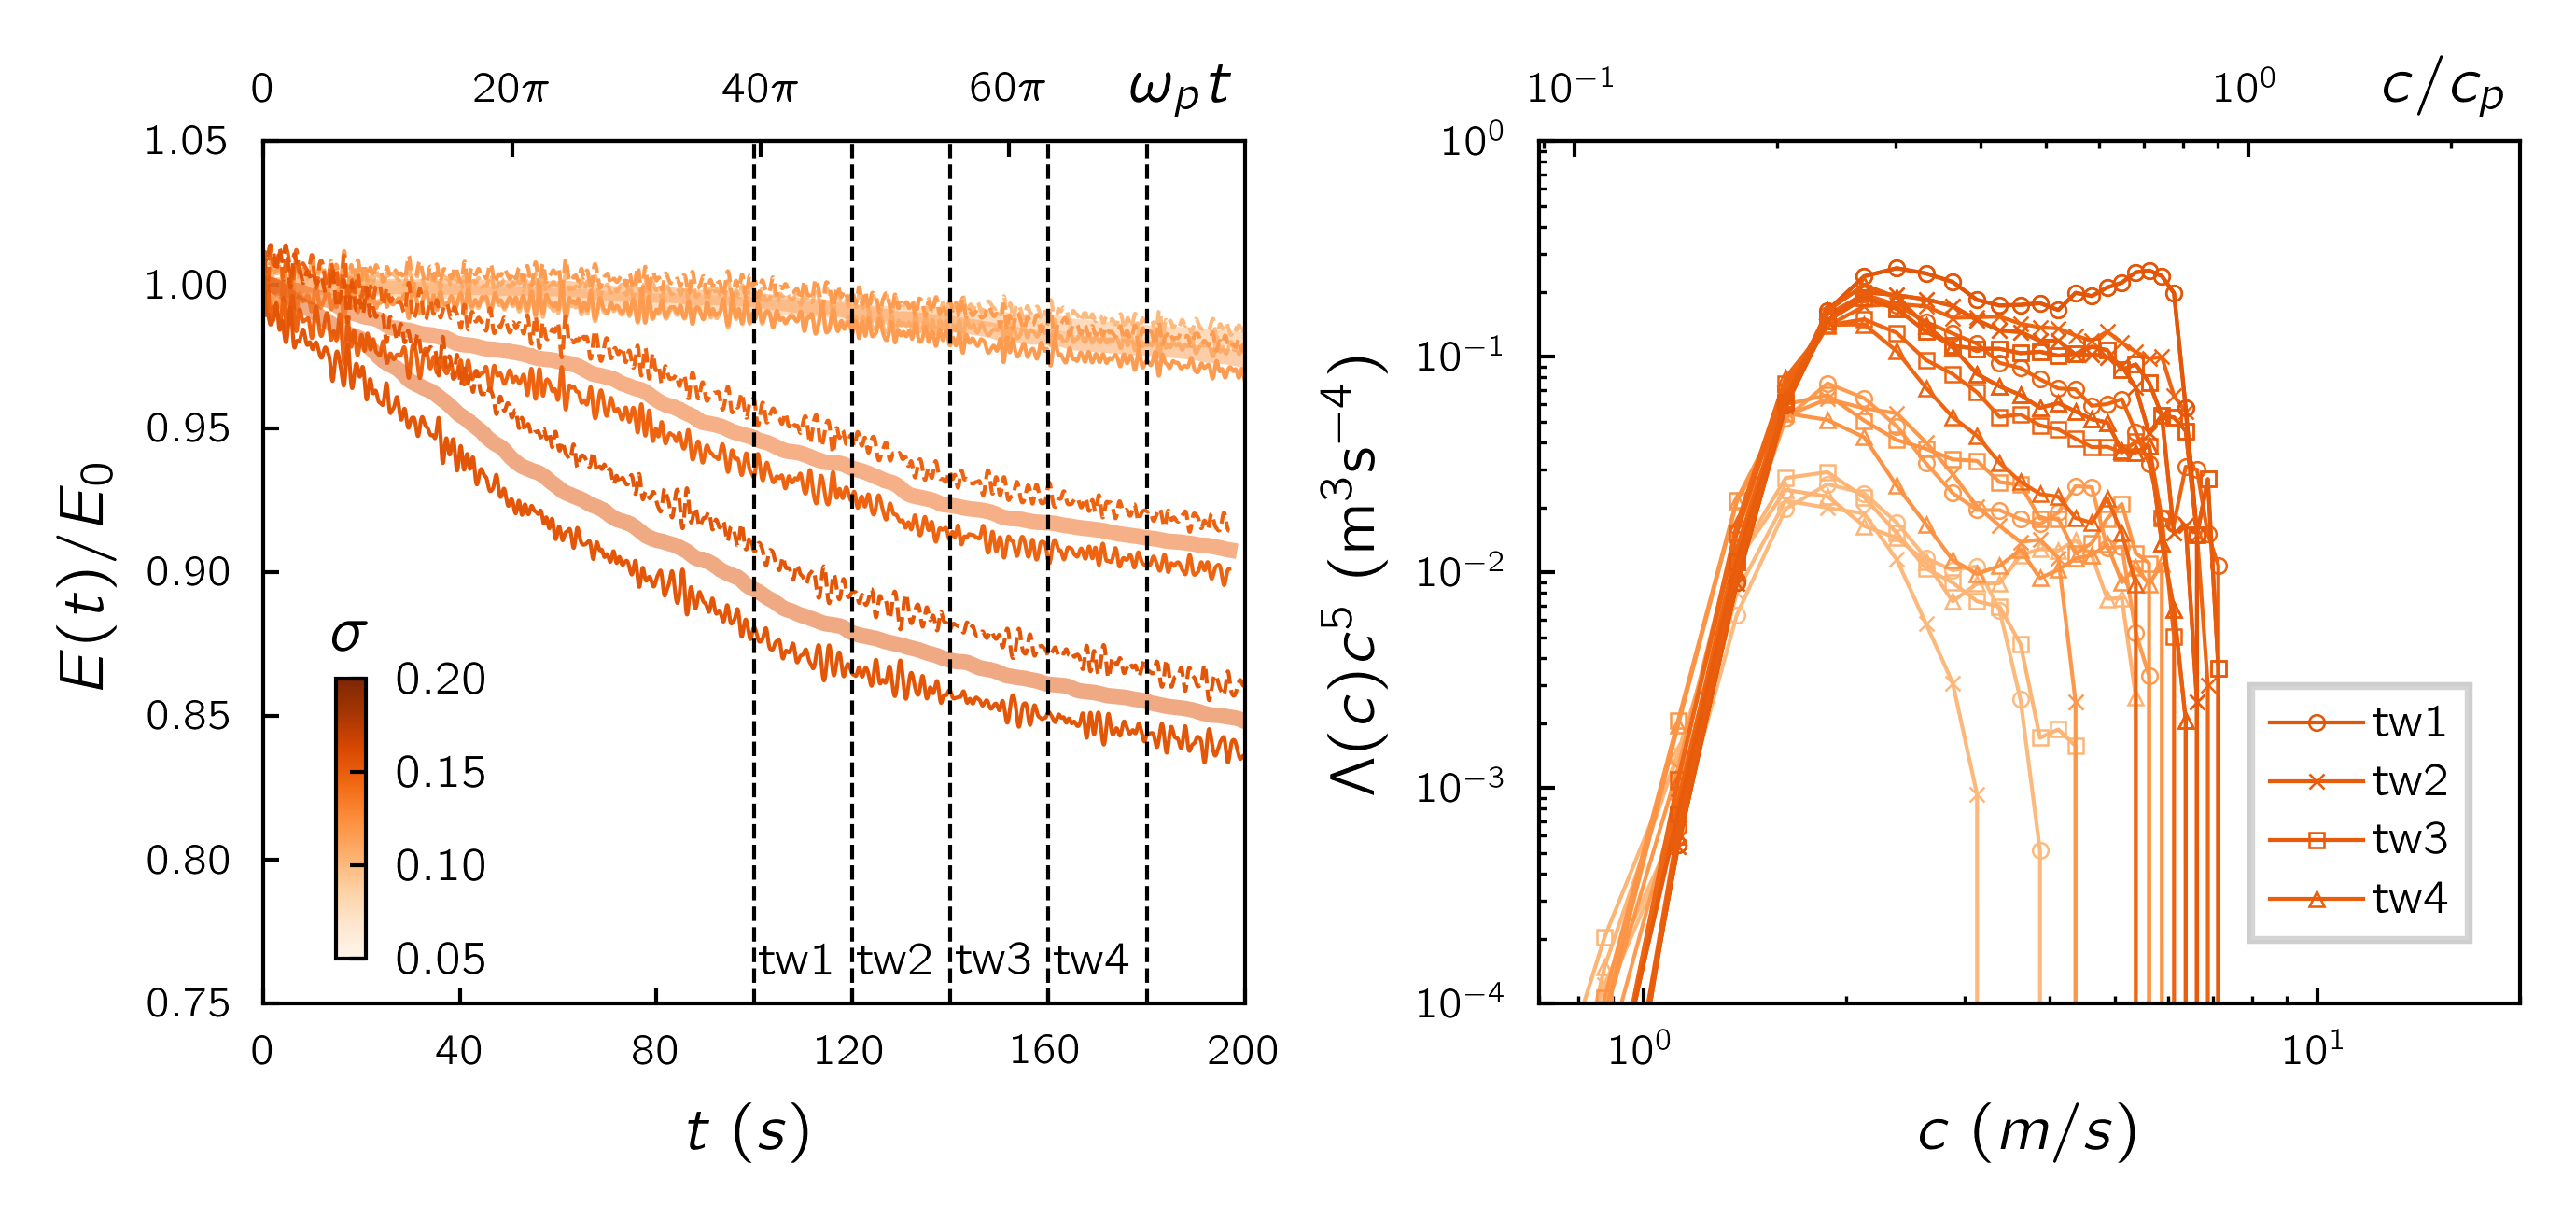

In [31]:
''' We need to smooth out the Ek and Ep curves otherwise the oscillation is going to impede dEk/dt and dEp/dt calculation 
    But we are only analyzing the value of dE/dt, so I removed the filter. 
'''
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
from matplotlib.ticker import FuncFormatter, MultipleLocator
fig, axes = plt.subplots (1, 2, figsize=[5.2,2])

ax = axes[0]
for k, config in enumerate(config_set[:5]):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1) and (case.Npower == 5):
            filename = '../../multilayer/JFM2023/compilation/' + 'dissipation_' + case.label + '.nc'
            case.diss = xr.open_dataset(filename, engine='h5netcdf')
            print(filename)
            print(case.path)
            print(case.diss.sigma.values)
            print(case.diss.dEdt.values)
            
            filename = '../../multilayer/JFM2023/compilation/' + 'energy_' + case.label + '.txt'
            case.energy = pd.read_csv(filename, delimiter=' ', names=['t','ke','gpe'])
            window_size = 1
            windows = case.energy.rolling(window_size)
            moving_averages = windows.mean()
            
            cc = mpl.colormaps['Oranges']((case.diss.sigma.values[0]-0.05)/(0.2-0.05))
            case.omegap = (case.diss.kp*9.8)**0.5
            ax.plot(moving_averages.t, 2*moving_averages.ke/(case.energy.ke[0]+case.energy.gpe[0]), '--', c=cc)
            ax.plot(moving_averages.t, 2*moving_averages.gpe/(case.energy.ke[0]+case.energy.gpe[0]), '-', c=cc)
            # ax.plot(moving_averages.t*(case.diss.kp*9.8)**0.5, (moving_averages.ke+moving_averages.gpe)/(case.energy.ke[0]+case.energy.gpe[0]), '-', c=cc)
            ax.plot(case.energy.t, (case.energy.ke+case.energy.gpe)/(case.energy.ke[0]+case.energy.gpe[0]), 
                    alpha=0.5, lw=2, c=cc)
            
            case.dEkdt = []; case.dEpdt = []            
            for tseries in tseries_ensem:
                # print('From t = %g to %g.' %(tseries[0], tseries[-1]))
                idx1 = (np.abs(moving_averages.t - tseries[0])).argmin()
                idx2 = (np.abs(moving_averages.t - tseries[-1])).argmin()
                dEkdt = (moving_averages.ke[idx1] - moving_averages.ke[idx2])/(tseries[-1]-tseries[0])
                dEpdt = (moving_averages.gpe[idx1] - moving_averages.gpe[idx2])/(tseries[-1]-tseries[0])           
                case.dEkdt.append(dEkdt); case.dEpdt.append(dEpdt)
            case.dEkdt = np.array(case.dEkdt); case.dEpdt = np.array(case.dEpdt)
            case.dEdt = (case.dEkdt + case.dEpdt)/case.diss.L0**2
            print((case.dEkdt+case.dEpdt)/200**2)
            
for xloc in (100,120,140,160,180):            
    ax.axvline(x=xloc, color = 'k', linestyle = '--')
ax.set_xlabel(r'$t \;(s)$'); ax.set_xlim([0,200])
ax.set_ylabel(r'$E(t)/E_0$'); ax.set_ylim([0.75,1.05])
ax.set_xticks([0,40,80,120,160,200])
ax.annotate('tw1',(101,0.76), fontsize=6)
ax.annotate('tw2',(121,0.76), fontsize=6)
ax.annotate('tw3',(141,0.76), fontsize=6)
ax.annotate('tw4',(161,0.76), fontsize=6)

# Add normalized axis
def timesomega(x):
    global case
    return x * case.omegap
def divideomega(x):
    global case
    return x /case.omegap
secax = ax.secondary_xaxis('top', functions=(timesomega, divideomega))
# secax.set_xlabel('$\omega_p t$')
# ticklabelpad = mpl.rcParams['xtick.major.pad']
ax.annotate('$\omega_p t$', xy=(1,1), xytext=(-2, 3), ha='right', va='bottom',
             xycoords='axes fraction', textcoords='offset points')
tick_pos =[ 0,20*np.pi,40*np.pi,60*np.pi,80*np.pi]
labels = ['0','$20\pi$','$40\pi$','$60\pi$','$80\pi$']
secax.set_xticks(tick_pos, labels)

ax2  = fig.add_axes([0.15,0.15,0.01,0.25])
norm = mpl.colors.Normalize(vmin=0.05, vmax=0.2)
cbar = mpl.colorbar.ColorbarBase(ax2, cmap=plt.get_cmap('Oranges'), norm=norm, orientation='vertical', ticks=(0.05,0.1,0.15,0.2))
cbar.ax.tick_params(labelsize=6)
cbar.ax.text(0.5, 1.15, r'$\sigma$', ha='center', va='center', transform=cbar.ax.transAxes)

""" Energy dissipation distribution from Lambda(c). """
ax = axes[1]
lines = ['-o','-x','-s','-^']

for k, config in enumerate(config_set[:5]):
    print('P=%g' %config.P)
    for j,case in enumerate(config.cases):
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
#             case.diss.cc = 'k'
            # bins = case.hist_ensem['bins']
            # bins_plotting = case.diss.cbins
            bins_plotting = case.diss.cbins[1:] - (case.diss.cbins[2] - case.diss.cbins[1])/2
            case.zeroth_ensem = []
            case.first_ensem = []
            case.fifth_ensem = []
            for i in range(len(case.diss.Lambda)):
                case.cp = (9.8/config.kp)**0.5
                lambdac = case.diss.Lambda[i]/2**case.LEVEL/case.config.L0/(case.diss.cbins[2] - case.diss.cbins[1])
                cc = mpl.colormaps['Oranges']((case.diss.sigma.values[i]-0.05)/(0.2-0.05))
                ax.plot(bins_plotting, lambdac*bins_plotting**5, lines[i], 
                        c=cc, alpha=1, lw=0.5)            # The extra filter 
                case.zeroth_ensem.append(np.sum(case.diss.Lambda[i]/2**case.LEVEL/case.config.L0))
                case.first_ensem.append(np.sum(case.diss.Lambda[i]/2**case.LEVEL/case.config.L0*bins_plotting))
                case.fifth_ensem.append(np.sum(case.diss.Lambda[i]/2**case.LEVEL/case.config.L0*bins_plotting**5))

''' For legends '''
lls = []
case = config_set[3].cases[0]
bins = case.diss.cbins
bins_plotting = bins[1:] - (bins[2] - bins[1])/2
case.cp = (9.8/config.kp)**0.5
for i in range(len(case.diss.Lambda)):
    lambdac = case.diss.Lambda[i]/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])
    cc = mpl.colormaps['Oranges']((case.diss.sigma.values[i]-0.05)/(0.2-0.05))
    ll, = ax.plot(bins_plotting, lambdac*bins_plotting**5, lines[i],
                    c=cc, alpha=1, lw=0.5)            # The extra filter 
    lls.append(ll)
    
ax.set_xscale('log'); ax.set_yscale('log')
ax.set_ylim([10**(-4),10**(0)])
ax.set_xlim([0.7,20])
ax.set_xlabel(r'$c\;(m/s)$')
ax.set_ylabel(r'$\Lambda(c)c^5 \;\mathrm{(m^{3}s^{-4})}$')
legend1 = ax.legend([lls[0],lls[1],lls[2],lls[3]], ['tw1', 'tw2', 'tw3', 'tw4'], fontsize=6, 
                    handler_map={tuple: HandlerTuple(ndivide=None)}, handlelength=2, bbox_to_anchor=(0.697, 0.4))
ax.add_artist(legend1)

def timescp(x):
    global case
    return x * case.cp
def dividecp(x):
    global case
    return x /case.cp
secax = ax.secondary_xaxis('top', functions=(dividecp, timescp))
ax.annotate('$c/c_p$', xy=(1,1), xytext=(-2, 3), ha='right', va='bottom',
             xycoords='axes fraction', textcoords='offset points')
tick_pos =[0.1,1]
labels = ['$10^{-1}$','$10^{0}$']
secax.set_xticks(tick_pos, labels)

plt.subplots_adjust(wspace=0.3)
# plt.savefig('../figures/multilayer-diss/fig1cd.pdf', bbox_inches='tight')
plt.show()

/var/folders/3x/6pxbtcd51_3f99c16lp56vbr0000gn/T/ipykernel_42402/2535434763.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.text(0.5,0.9,r'$\nu_\mathrm{fit}=%.4f$' %nufit, transform=ax.transAxes, fontsize=6)


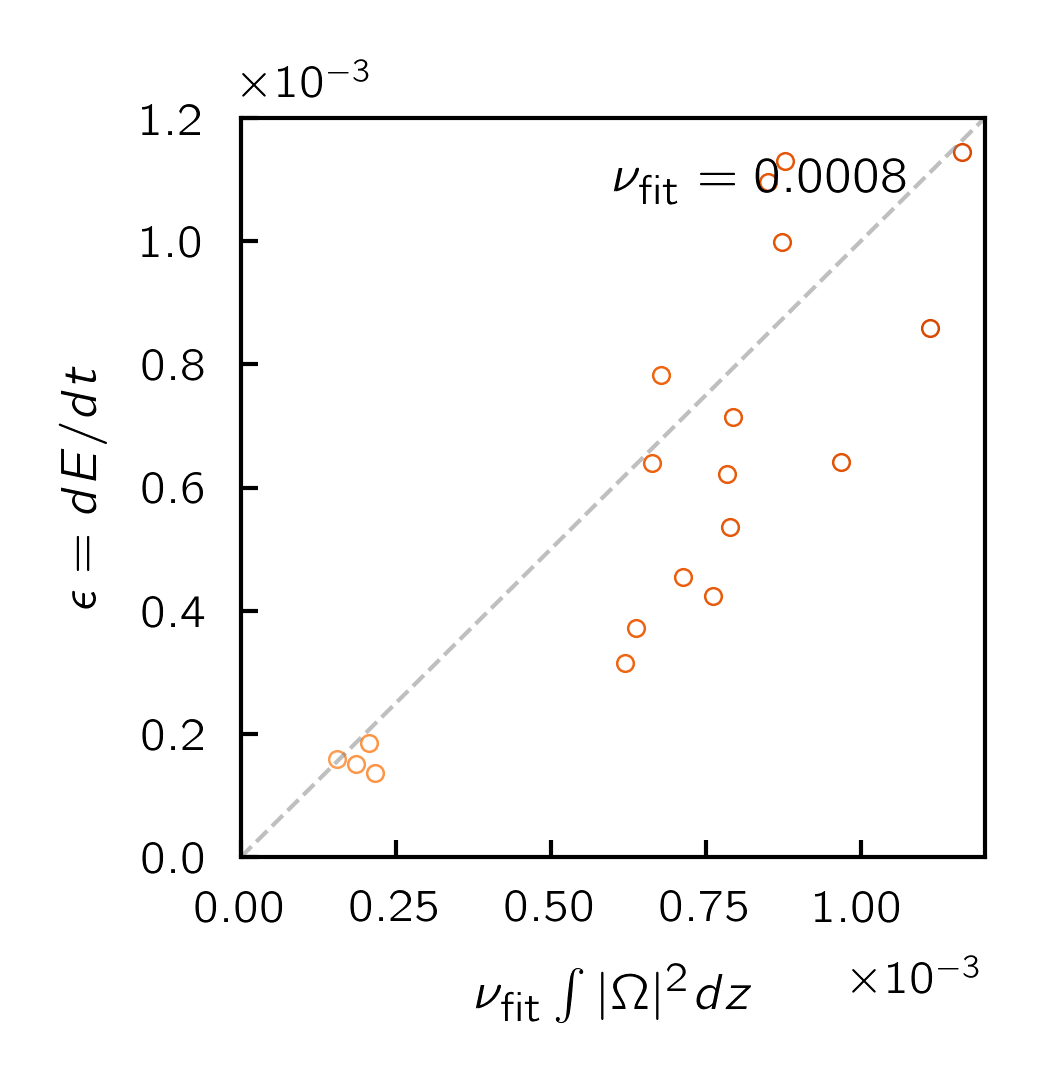

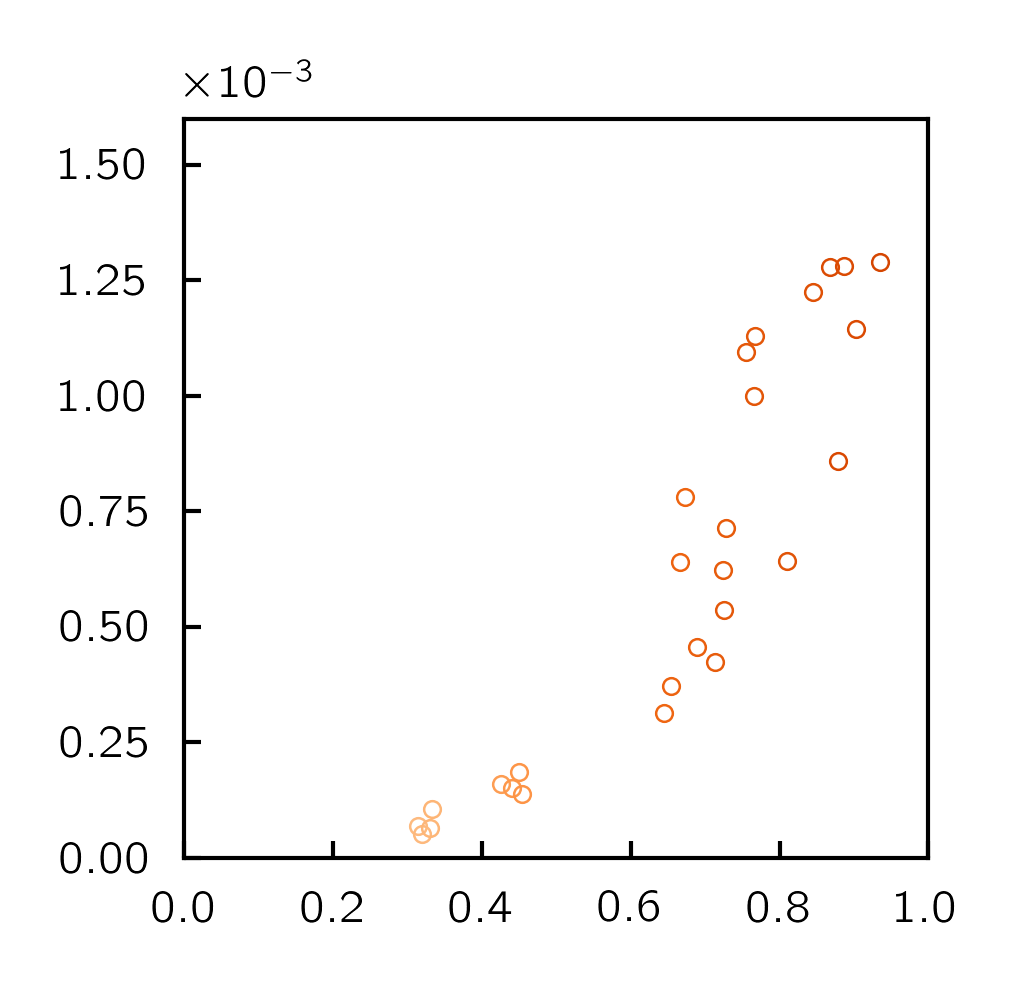